In [1]:
import cv2
import math
import random
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
%matplotlib inline
print "OpenCV Version : %s " % cv2.__version__

OpenCV Version : 2.4.9 


In [2]:
# Load the image
img = cv2.imread('../img/kelvin_cropped/img_104_kelloggcracklinoatbran_cropped.png')
alpha_img = cv2.imread('../img/kelvin_cropped/img_104_kelloggcracklinoatbran_cropped.png', cv2.IMREAD_UNCHANGED)

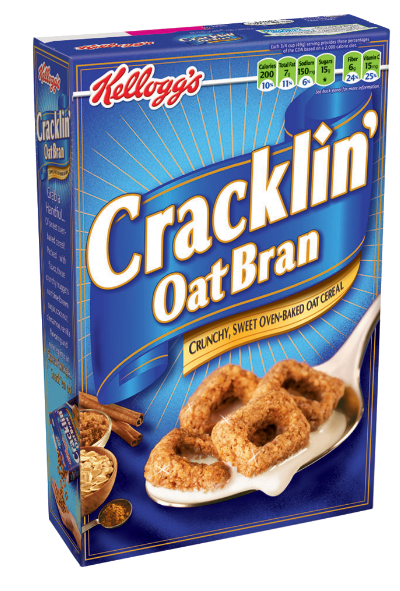

In [3]:
plt.figure(figsize=(20,10))
plt.axis('off');
plt.imshow(cv2.cvtColor(alpha_img, cv2.COLOR_BGR2RGB));

In [4]:
print type(alpha_img)
print alpha_img.shape

<type 'numpy.ndarray'>
(960, 626, 4)


In [5]:
# Compute BGR means and standard deviation (background included) using build-in function
(means, stds) = cv2.meanStdDev(alpha_img)
print 'BGR Mean (background included): \n'
print means
print '\n'
print 'BGR Standard Deviation (background included): \n'
print stds

BGR Mean (background included): 

[[ 156.91763345]
 [ 140.92055711]
 [ 137.34117579]
 [ 218.98829373]]


BGR Standard Deviation (background included): 

[[ 74.20853118]
 [ 77.15072131]
 [ 89.74721154]
 [ 88.80395324]]


In [6]:
# Colour Mean of image EXCLUDING background
def colourMean(alpha_img):
    b = [];g = [];r = []; a = [] # b: Blue, g: Green, r: Red, a: Alpha
    for i in range(alpha_img.shape[0]):
        for j in range(alpha_img.shape[1]):
            if(alpha_img[i][j][3] != 0):
                b.append(alpha_img[i][j][0])
                g.append(alpha_img[i][j][1])
                r.append(alpha_img[i][j][2])
                a.append(alpha_img[i][j][3])
                
    return [round(np.mean(b), 2) , round(np.mean(g), 2), round(np.mean(r), 2), round(np.mean(a), 2)]

In [7]:
# Colour Mean of image INCLUDING background
def colourMeanwithBG(alpha_img):
    b = [];g = [];r = []; a = [] # b: Blue, g: Green, r: Red, a: Alpha
    for i in range(alpha_img.shape[0]):
        for j in range(alpha_img.shape[1]):
            b.append(alpha_img[i][j][0])
            g.append(alpha_img[i][j][1])
            r.append(alpha_img[i][j][2])
            a.append(alpha_img[i][j][3])
            
    return [round(np.mean(b), 2) , round(np.mean(g), 2), round(np.mean(r), 2), round(np.mean(a), 2)]

In [8]:
print 'BGR Mean (background excluded):'
print colourMean(alpha_img)
print '\n'
print 'BGR Mean (background included):'
print colourMeanwithBG(alpha_img)

BGR Mean (background excluded):
[140.79, 122.16, 117.99, 255.0]


BGR Mean (background included):
[156.92, 140.92, 137.34, 218.99]


In [9]:
# Colour standard deviation of image EXCLUDING background
def colourSD(alpha_img):
    means = colourMean(alpha_img)
    b = []; g = []; r = []; a = []
    for i in range(alpha_img.shape[0]):
        for j in range(alpha_img.shape[1]):
            if(alpha_img[i][j][3] != 0):
                b.append((alpha_img[i][j][0] - means[0]) ** 2)
                g.append((alpha_img[i][j][1] - means[1]) ** 2)
                r.append((alpha_img[i][j][2] - means[2]) ** 2)
                a.append((alpha_img[i][j][3] - means[3]) ** 2)
    
    sd_b = round(math.sqrt(np.mean(b)), 2)
    sd_g = round(math.sqrt(np.mean(g)), 2)
    sd_r = round(math.sqrt(np.mean(r)), 2)
    sd_a = round(math.sqrt(np.mean(a)), 2)
    
    return [sd_b, sd_g, sd_r, sd_a]

In [10]:
# Colour standard deviation of image INCLUDING background
def colourSDwithBG(alpha_img):
    means = colourMeanwithBG(alpha_img)
    b = []; g = []; r = []; a = []
    for i in range(alpha_img.shape[0]):
        for j in range(alpha_img.shape[1]):
            b.append((alpha_img[i][j][0] - means[0]) ** 2)
            g.append((alpha_img[i][j][1] - means[1]) ** 2)
            r.append((alpha_img[i][j][2] - means[2]) ** 2)
            a.append((alpha_img[i][j][3] - means[3]) ** 2)
    
    sd_b = round(math.sqrt(np.mean(b)), 2)
    sd_g = round(math.sqrt(np.mean(g)), 2)
    sd_r = round(math.sqrt(np.mean(r)), 2)
    sd_a = round(math.sqrt(np.mean(a)), 2)
    
    return [sd_b, sd_g, sd_r, sd_a]

In [11]:
print 'BGR Standard Deviation (background excluded):'
print colourSD(alpha_img)
print '\n'
print 'BGR Standard Deviation (background included):'
print colourSDwithBG(alpha_img)

BGR Standard Deviation (background excluded):
[67.6, 66.63, 82.03, 0.0]


BGR Standard Deviation (background included):
[74.21, 77.15, 89.75, 88.8]


In [36]:
# return a 1 x 6 array represents BGR mean and standard deviation excluded background
def colourMeanSD(alpha_img):
    means = colourMean(alpha_img)
    stds = colourSD(alpha_img)
    return means[:3] + stds[:3]

# return a 1 x 6 array represents BGR mean and standard deviation included background
def colourMeanSDwithBG(alpha_img):
    means = colourMeanwithBG(alpha_img)
    stds = colourSDwithBG(alpha_img)
    return means[:3] + stds[:3]

In [37]:
# Slow Approach
print 'BGR mean and standard deviation excluded background'
print colourMeanSD(alpha_img)
print '\n'
print 'BGR mean and standard deviation included background'
print colourMeanSDwithBG(alpha_img)

BGR mean and standard deviation excluded background
[140.79, 122.16, 117.99, 67.6, 66.63, 82.03]


BGR mean and standard deviation included background
[156.92, 140.92, 137.34, 74.21, 77.15, 89.75]


In [14]:
# Restructure the alpha_img into 1D array for sampling
def reform(alpha_img):
    new_alpha_img = []
    for i in range(alpha_img.shape[0]):
        for j in range(alpha_img.shape[1]):
            new_alpha_img.append(alpha_img[i][j])
    return new_alpha_img

In [15]:
alpha_img_1D = reform(alpha_img)
print len(alpha_img_1D)
print len(alpha_img_1D[0])

600960
4


In [26]:
# Random Sampling using 0.1*total_num_pixels
rdm_sample = random.sample(alpha_img_1D, int(0.2 * len(alpha_img_1D)))

In [27]:
print len(rdm_sample)
print rdm_sample[0]

120192
[152  95  39 255]


In [28]:
# Sample Colour Mean of image EXCLUDING background
def SampleColourMean(rdm_sample):
    b = [];g = [];r = []; a = [] # b: Blue, g: Green, r: Red, a: Alpha
    for i in range(len(alpha_img)):
        if(rdm_sample[i][3] != 0):
            b.append(rdm_sample[i][0])
            g.append(rdm_sample[i][1])
            r.append(rdm_sample[i][2])
            a.append(rdm_sample[i][3])
                
    return [round(np.mean(b), 2) , round(np.mean(g), 2), round(np.mean(r), 2), round(np.mean(a), 2)]

In [29]:
# Sample Colour Standard Deviation of image EXCLUDING background
def SampleColourSD(rdm_sample):
    means = SampleColourMean(rdm_sample)
    b = [];g = [];r = []; a = [] # b: Blue, g: Green, r: Red, a: Alpha
    for i in range(len(rdm_sample)):
        if(rdm_sample[i][3] != 0):
            b.append((rdm_sample[i][0] - means[0]) ** 2)
            g.append((rdm_sample[i][1] - means[1]) ** 2)
            r.append((rdm_sample[i][2] - means[2]) ** 2)
            a.append((rdm_sample[i][3] - means[3]) ** 2)
            
    sd_b = round(math.sqrt(np.mean(b)), 2)
    sd_g = round(math.sqrt(np.mean(g)), 2)
    sd_r = round(math.sqrt(np.mean(r)), 2)
    sd_a = round(math.sqrt(np.mean(a)), 2)
    
    return [sd_b, sd_g, sd_r, sd_a]

In [30]:
SampleColourMean(rdm_sample)

[139.82, 123.52, 121.24, 255.0]

In [31]:
SampleColourSD(rdm_sample)

[67.5, 66.71, 82.07, 0.0]

In [32]:
# return a 1 x 6 array represents BGR Sample mean and standard deviation excluded background
def SampleColourMeanSD(rdm_sample):
    means = SampleColourMean(rdm_sample)
    stds = SampleColourSD(rdm_sample)
    return means[:3] + stds[:3]

In [33]:
print 'Sample Mean and Standard Deviation (background removed)'
print SampleColourMeanSD(rdm_sample)

Sample Mean and Standard Deviation (background removed)
[139.82, 123.52, 121.24, 67.5, 66.71, 82.07]


In [34]:
print 'Original Mean and Standard Deviation (background removed)'
print colourMeanSD(alpha_img)

Original Mean and Standard Deviation (background removed)
[140.79, 122.16, 117.99, 67.6, 66.63, 82.03]


In [35]:
print 'Original Mean and Standard Deviation (background included)'
print colourMeanSDwithBG(alpha_img)

Original Mean and Standard Deviation (background included)
[156.92, 140.92, 137.34, 74.21, 77.15, 89.75]
